In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('Financial Distress.csv')
data.head()

,Company,Time,x1,x2,x3,x4,x5,x6,x7,x8,...,x75,x76,x77,x78,x79,x80,x81,x82,x83,Financial Distress
0,1,1,1.2810,0.022934,0.87454,1.21640,0.060940,0.188270,0.52510,0.018854,...,27.07,26.102,16.000,16.0,0.2,22,0.060390,30,49,0
1,1,2,1.2700,0.006454,0.82067,1.00490,-0.014080,0.181040,0.62288,0.006423,...,31.31,30.194,17.000,16.0,0.4,22,0.010636,31,50,0
2,1,3,1.0529,-0.059379,0.92242,0.72926,0.020476,0.044865,0.43292,-0.081423,...,36.07,35.273,17.000,15.0,-0.2,22,-0.455970,32,51,0
3,1,4,1.1131,-0.015229,0.85888,0.80974,0.076037,0.091033,0.67546,-0.018807,...,39.80,38.377,17.167,16.0,5.6,22,-0.325390,33,52,1
4,2,1,1.0623,0.107020,0.81460,0.83593,0.199960,0.047800,0.74200,0.128030,...,27.07,26.102,16.000,16.0,0.2,29,1.251000,7,27,0


In [3]:
X=data.loc[:,'x1':'Financial Distress']

In [4]:
y=data['Financial Distress']

In [5]:
X.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x75,x76,x77,x78,x79,x80,x81,x82,x83,Financial Distress
count,3672.000000,3672.000000,3672.000000,3.672000e+03,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,...,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000
mean,1.387820,0.129706,0.615769,8.681599e-01,0.154949,0.106717,0.784031,39.274361,0.332610,0.136263,...,91.920506,89.115908,17.780855,15.198708,-2.664305,19.714597,1.100488,13.122277,33.044935,0.037037
std,1.452926,0.120013,0.177904,5.719519e-01,0.124904,0.210555,1.033606,4305.688039,0.346135,0.138978,...,64.656504,64.349382,2.040152,2.828648,8.192663,7.508588,2.666733,9.465907,13.714563,0.188878
min,0.075170,-0.258080,0.016135,5.350000e-07,-0.269790,-0.627750,0.035160,-145000.000000,-3.611200,-0.318660,...,24.318000,23.776000,15.250000,12.000000,-20.200000,1.000000,-0.499220,1.000000,2.000000,0.000000
25%,0.952145,0.048701,0.501888,5.525575e-01,0.070001,-0.027754,0.436003,0.056185,0.157677,0.033820,...,39.800000,38.377000,16.000000,13.000000,-7.000000,14.000000,0.189912,6.000000,21.000000,0.000000
50%,1.183600,0.107530,0.638690,7.752450e-01,0.131830,0.104325,0.641875,0.135585,0.302610,0.107270,...,66.120000,59.471000,17.000000,14.500000,0.200000,20.000000,0.594765,11.000000,34.000000,0.000000
75%,1.506475,0.188685,0.749425,1.039000e+00,0.219570,0.231230,0.896773,0.273423,0.484035,0.210017,...,130.500000,132.400000,20.000000,16.000000,2.100000,26.000000,1.355050,17.000000,44.000000,0.000000
max,51.954000,0.749410,0.967900,6.835600e+00,0.858540,0.929550,38.836000,209000.000000,3.810200,0.769620,...,227.500000,214.500000,22.000000,22.000000,8.600000,37.000000,128.400000,49.000000,74.000000,1.000000


In [ ]:
#X.isnull().sum().sort_values(ascending=False) # No null values

In [13]:
# We have about 3.7% of anomalies

y.value_counts()[1]/sum(y.value_counts())

0.037037037037037035

In [14]:
y.value_counts()

0    3536
1     136
Name: Financial Distress, dtype: int64

In [49]:
from sklearn.ensemble import IsolationForest
# define % of anomalies
anomalies_ratio = 0.037

if_sk = IsolationForest(n_estimators = 20, 
                        max_samples = 256,
                        contamination = anomalies_ratio, 
                        behaviour= " new", 
                        random_state = np.random.RandomState(42))
if_sk.fit(X)
y_pred = if_sk.predict(X)
y_pred = [1 if x == -1 else 0 for x in y_pred]

In [50]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred)

array([[3422,  114],
       [ 114,   22]])

In [20]:
from sklearn.metrics import recall_score
recall_score(y, y_pred)

0.16176470588235295

In [84]:
if_sk1 = IsolationForest(n_estimators=200, max_samples=256, contamination=float(.12), \
                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42,behaviour='new', verbose=0)
if_sk1.fit(X)
y_pred1 = if_sk1.predict(X)
y_pred1 = [1 if x == -1 else 0 for x in y_pred1]
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, y_pred1))
from sklearn.metrics import recall_score
print(recall_score(y, y_pred1))

[[3156  380]
 [  75   61]]
0.4485294117647059


59
61

In [87]:
scores = if_sk1.decision_function(X)

In [155]:
y_pred2=[1 if x<0 else 0 for x in scores]# zero threshold which is by default is giving best results

In [156]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, y_pred2))
from sklearn.metrics import recall_score
print(recall_score(y, y_pred2))

[[3156  380]
 [  75   61]]
0.4485294117647059


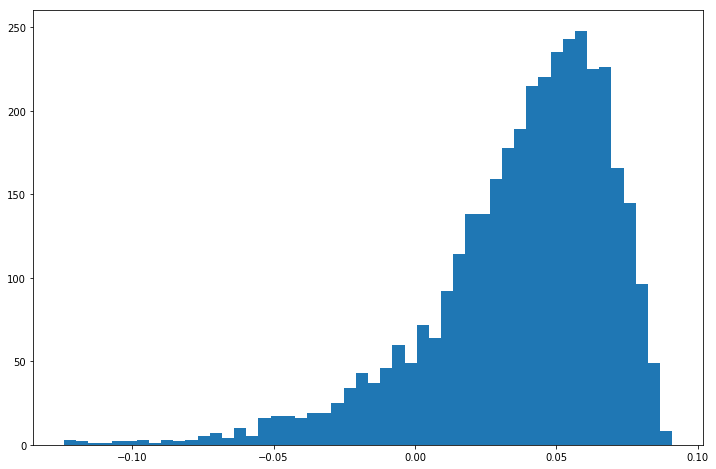

In [91]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.hist(scores, bins=50);